## Lecture 11: conditional randomization test

In [131]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from typing import Callable, Tuple
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [ ]:
# Generate example data
np.random.seed(42)
n_samples = 1000

# Generate confounding variable Z
Z = np.random.normal(0, 1, (n_samples, 2))

# Generate X with dependence on Z
X = Z[:, 0] + np.random.normal(0, 0.1, n_samples)

# Generate Y with dependence on both X and Z
# X, Z0, Z1
Y = 0.4 * X + 0.4 * Z[:, 1] + np.random.normal(0, 0.5, n_samples)

In [132]:
dat = np.hstack((X.reshape(-1,1), Z))
est = sm.OLS(Y, dat)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.123
Model:                            OLS   Adj. R-squared (uncentered):              0.120
Method:                 Least Squares   F-statistic:                              46.40
Date:                Thu, 21 Nov 2024   Prob (F-statistic):                    4.53e-28
Time:                        16:38:14   Log-Likelihood:                         -1443.4
No. Observations:                1000   AIC:                                      2893.
Df Residuals:                     997   BIC:                                      2907.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [133]:
n_permutations = 1000

# Compute observed test statistic
observed_stat = est2.params[0]

# Perform permutations
permuted_stats = np.zeros(n_permutations)

for i in tqdm(range(n_permutations)):
    # Generate permuted X
    X_permuted = np.zeros_like(X)
    for j in range(len(X)):
        # Draw from conditional distribution
        X_permuted[j] = Z[j, 0] + np.random.normal(0, 0.1) # this is the true conditional distribution

# Compute test statistic for permuted data
    dat = np.hstack((X_permuted.reshape(-1,1), Z))
    est = sm.OLS(Y, dat)
    est2 = est.fit()

    permuted_stats[i] = est2.params[0]

# Compute p-value
p_value = np.mean(np.abs(permuted_stats) >= np.abs(observed_stat))
        

100%|██████████| 1000/1000 [00:00<00:00, 1492.70it/s]


Text(0, 0.5, 'X')

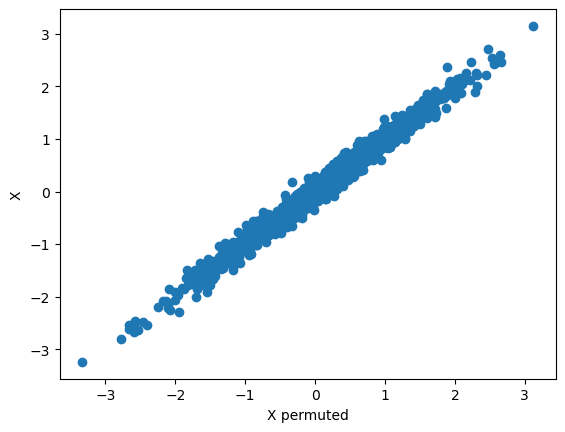

In [134]:
plt.scatter(X_permuted, X)
plt.xlabel('X permuted')
plt.ylabel('X')


Conditional Randomization Test Results:
Observed Statistic: 0.6441
P-value: 0.0360


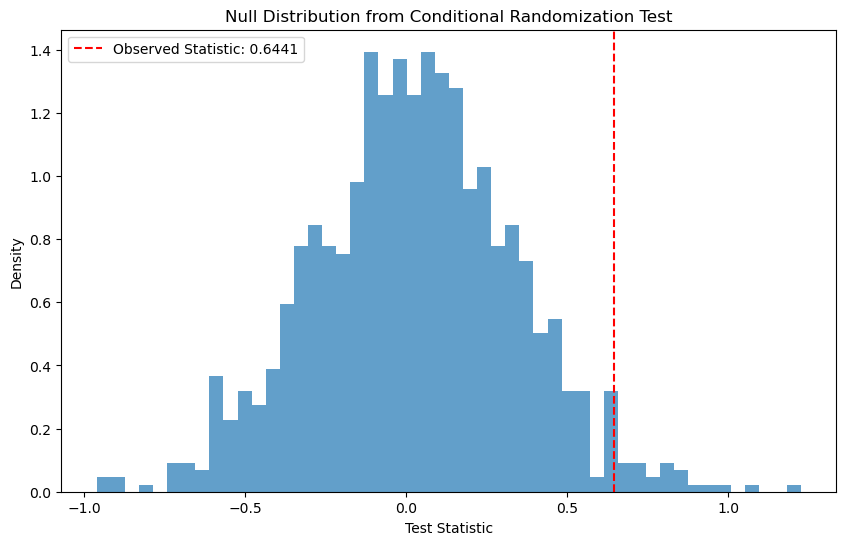

In [135]:
print("\nConditional Randomization Test Results:")
print(f"Observed Statistic: {observed_stat:.4f}")
print(f"P-value: {p_value:.4f}")

plt.figure(figsize=(10, 6))
plt.hist(permuted_stats, bins=50, density=True, alpha=0.7)
plt.axvline(observed_stat, color='red', linestyle='--', 
            label=f'Observed Statistic: {observed_stat:.4f}')

plt.title('Null Distribution from Conditional Randomization Test')
plt.xlabel('Test Statistic')
plt.ylabel('Density')
plt.legend()
plt.show()

In [136]:
# Generate example data
np.random.seed(42)
n_samples = 1000

# Generate confounding variable Z
Z = np.random.normal(0, 1, (n_samples, 2))

# Generate X with dependence on Z
X = Z[:, 0] + np.random.normal(0, 0.1, n_samples)

# Generate Y with dependence on both X and Z
Y = 0.4 * X + 0.2 * Z[:, 1] + np.random.normal(0, 1, n_samples)

In [138]:
cond_lm = LinearRegression()
cond_lm.fit(X.reshape(-1,1), Z[:,0])
Z_pred = cond_lm.predict(X.reshape(-1,1))
sigma = np.sqrt(np.power(Z_pred-Z[:,0],2).sum()/(n_samples-1))

In [139]:
# test Z_0
n_permutations = 1000

XZ = np.hstack((X.reshape(-1,1), Z[:, 1].reshape(-1,1)))
dat = np.hstack((Z[:, 0].reshape(-1,1), XZ))
est = sm.OLS(Y, dat)
est2 = est.fit()

# Compute observed test statistic
observed_stat = est2.params[0]

# Perform permutations
permuted_stats = np.zeros(n_permutations)

for i in tqdm(range(n_permutations)):
    # Generate permuted X
    Z_permuted = np.zeros_like(X)
    for j in range(len(X)):
        # Draw from conditional distribution
        Z_permuted[j] = Z_pred[j] + sigma * np.random.normal(0, 1)

# Compute test statistic for permuted data
    dat = np.hstack((Z_permuted.reshape(-1,1), XZ))
    est = sm.OLS(Y, dat)
    est2 = est.fit()

    permuted_stats[i] = est2.params[0]


# Compute p-value
p_value = np.mean(np.abs(permuted_stats) >= np.abs(observed_stat))

# Compute confidence intervals
ci_lower = np.percentile(permuted_stats, 2.5)
ci_upper = np.percentile(permuted_stats, 97.5)
        

100%|██████████| 1000/1000 [00:00<00:00, 1427.17it/s]



Conditional Randomization Test Results:
Observed Statistic: -0.3038
P-value: 0.3640


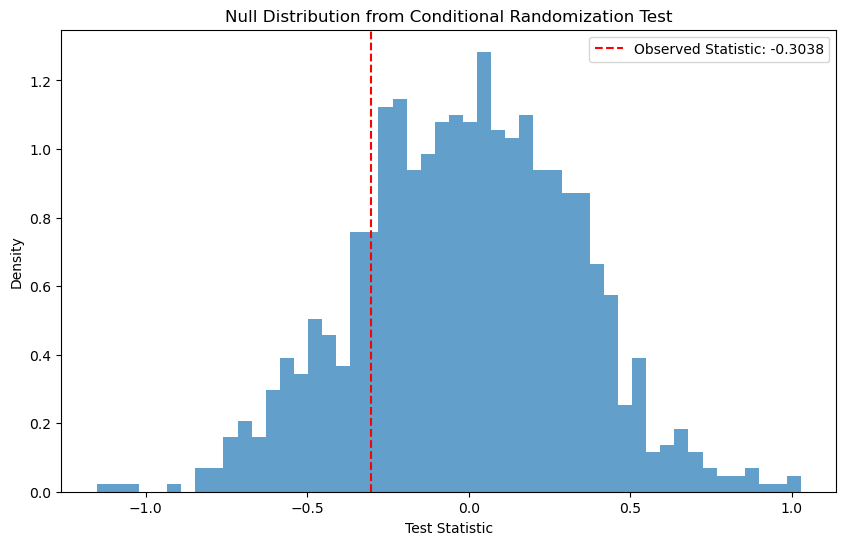

In [141]:
# Print results
print("\nConditional Randomization Test Results:")
print(f"Observed Statistic: {observed_stat:.4f}")
print(f"P-value: {p_value:.4f}")

plt.figure(figsize=(10, 6))
plt.hist(permuted_stats, bins=50, density=True, alpha=0.7)
plt.axvline(observed_stat, color='red', linestyle='--', 
            label=f'Observed Statistic: {observed_stat:.4f}')

plt.title('Null Distribution from Conditional Randomization Test')
plt.xlabel('Test Statistic')
plt.ylabel('Density')
plt.legend()
plt.show()